# Linear Regression

## fitting model for Salary depending on YearsExperience

In [26]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# reading data
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [28]:
# spliting the data to train 75% and test 25%
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [29]:
# importing scikit-learn to make the best fit line ( to train the model )
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)
print('Intercept : %.2f' % regr.intercept_[0])
print('Coefficient : %.2f' % regr.coef_[0][0])

Intercept : 24705.49
Coefficient : 9462.00


In [30]:
# for testing
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
predicted_y = regr.predict(test_x)

print("Mean Absolute Error:", np.mean(np.absolute(predicted_y - test_y)))
print("Mean Squared Error or Residual Square Error :", np.mean((predicted_y - test_y)**2))
print("R2-score :", r2_score(predicted_y, test_y))

Mean Absolute Error: 5279.142908593454
Mean Squared Error or Residual Square Error : 40049540.63531372
R2-score : 0.952568290581028


Text(0, 0.5, 'Salary')

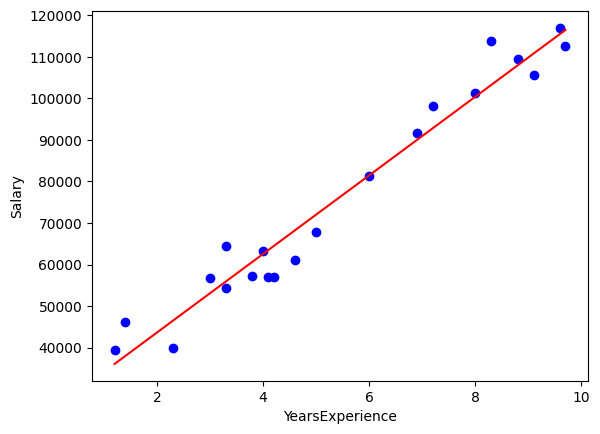

In [35]:
# plotting the bestfit line 
plt.scatter(train.YearsExperience, train.Salary, color='blue')
plt.plot(train_x, regr.predict(train_x), '-r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')